## Investigation Overview

>  In this Investigation i wanted to investigate the impact of changing the Prosper loan Grading system and its impact on the company using a revenue genration variable `LenderYeild` and a loss measurement variable `LP_GrossPrincipalLoss`

## Dataset Overview

> The data consists of information regarding 113864 Loans with, including LoanYeild, LoanStatus, BorrowAPR and other loan Variables.

In [1]:
import pandas as pd
import numpy as np

#To Visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.style.use('seaborn')
import warnings
warnings.simplefilter("ignore")

C:\Users\hp\AppData\Local\Temp\ipykernel_9700\3455337702.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
#importing Dataset
df_loan = pd.read_csv("C:\\Users\hp\\Downloads\\prosperLoanData (1).csv", 
                      parse_dates= ['ListingCreationDate', 'DateCreditPulled','FirstRecordedCreditLine','ClosedDate'])

In [3]:
df_loan_copy = df_loan.copy()

In [5]:
#casting the Crade type into a category variable
df_loan_copy['CreditGrade'] = df_loan_copy['CreditGrade'].astype('category')
df_loan_copy['ProsperRating (Alpha)'] = df_loan_copy['ProsperRating (Alpha)'].astype('category')
df_loan_copy['LoanStatus'] = df_loan_copy['LoanStatus'].astype('category')


In [6]:
df_loan_copy.columns = df_loan_copy.columns.str.replace(' ', '_')

# Distribution of The LP_GrossPrincipalLoss

The principal Loss amount has an extensive range of values from about \\$0 at its lowest to \\$25,000 max at its highest, it is plotted on a logarithmic scale, and the distribution is unimodal with a long right tail
 

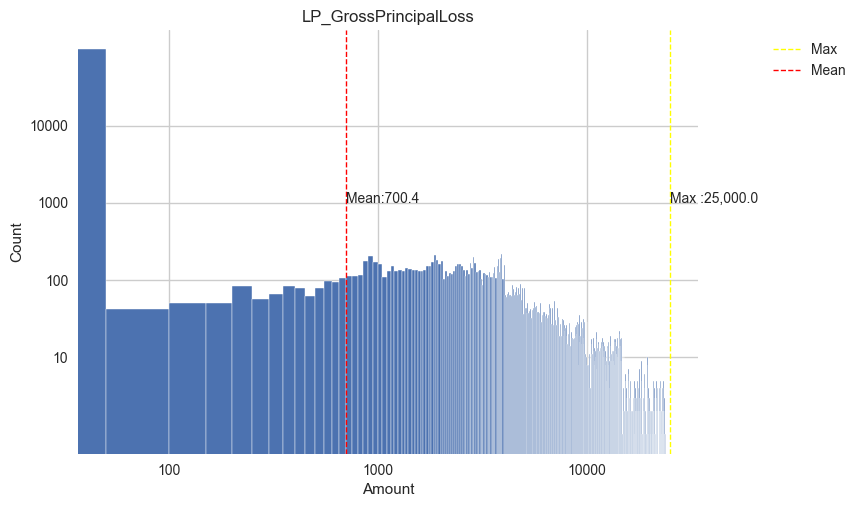

In [51]:
sns.set_style('whitegrid')
bins = (np.arange(0,df_loan_copy['LP_GrossPrincipalLoss'].max()+20, 50))
plt.hist(data = df_loan_copy, x = 'LP_GrossPrincipalLoss', bins = bins) 
ticks = [10,100,1000,10000]
labels = ['{}'.format(z) for z in ticks]
plt.xscale('log')
plt.yscale('log')
plt.xticks(ticks, labels);
plt.yticks(ticks, labels);
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('LP_GrossPrincipalLoss')


plt.axvline(df_loan_copy['LP_GrossPrincipalLoss'].max(),    # plotting the median line
                   color = 'yellow', linestyle = '--', linewidth = 1);


plt.axvline(df_loan_copy['LP_GrossPrincipalLoss'].median(),    # plotting the median line
           color = 'red', linestyle = '--', linewidth = 1);


plt.axvline(df_loan_copy['LP_GrossPrincipalLoss'].mean(),    # plotting the mean line
           color = 'red', linestyle = '--', linewidth = 1);

plt.text(df_loan_copy['LP_GrossPrincipalLoss'].mean(),1000,'Mean:{:,.1f}'.format(df_loan_copy['LP_GrossPrincipalLoss'].mean()));


#plt.text(df_loan_copy['LP_GrossPrincipalLoss'].min(),100,'Mean:{:,.1f}'.format(df_loan_copy['LP_GrossPrincipalLoss'].mean()));

plt.text(df_loan_copy['LP_GrossPrincipalLoss'].max(),1000,'Max :{:,.1f}'.format(df_loan_copy['LP_GrossPrincipalLoss'].max()));
plt.legend(['Max','Mean'],fancybox = True,bbox_to_anchor = (1.1,1));


# Distribution of The LenderYield

Lender yield is equal to the interest rate on the loan, less the servicing fee. Where 0.5 is a 50% interest in the loan, a large portion of the loan is at the 0.2 (20%), with a maximum value of 0.5 (50%,) the distribution is unimodal with a normal distribution


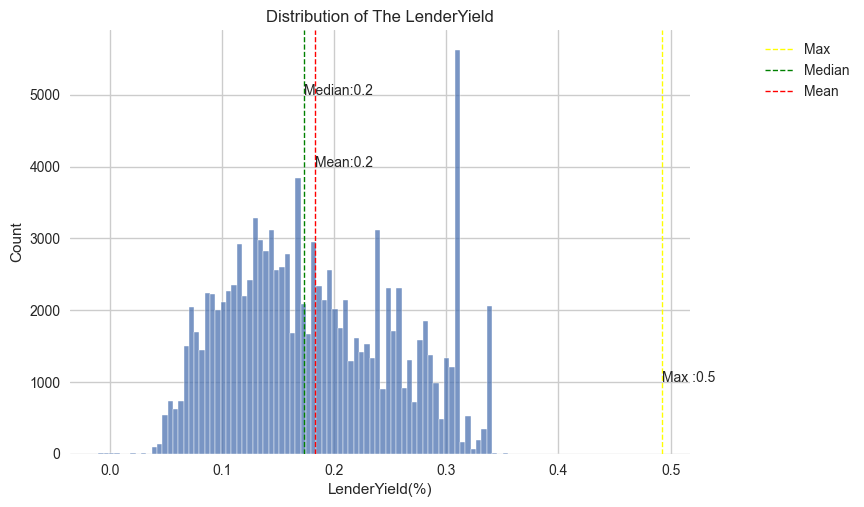

In [27]:
sns.histplot(data = df_loan_copy, x = 'LenderYield')
plt.title('Distribution of The LenderYield')
plt.axvline(df_loan_copy['LenderYield'].max(),    # plotting the median line
                   color = 'yellow', linestyle = '--', linewidth = 1);

plt.xlabel('LenderYield(%)')
plt.axvline(df_loan_copy['LenderYield'].median(),    # plotting the median line
           color = 'green', linestyle = '--', linewidth = 1);


plt.axvline(df_loan_copy['LenderYield'].mean(),    # plotting the mean line
           color = 'red', linestyle = '--', linewidth = 1);

plt.text(df_loan_copy['LenderYield'].mean(),4000,'Mean:{:,.1f}'.format(df_loan_copy['LenderYield'].mean()));


plt.text(df_loan_copy['LenderYield'].median(),5000,'Median:{:,.1f}'.format(df_loan_copy['LenderYield'].median()));

plt.text(df_loan_copy['LenderYield'].max(),1000,'Max :{:,.1f}'.format(df_loan_copy['LenderYield'].max()));

plt.legend(['Max','Median','Mean'],fancybox = True,bbox_to_anchor = (1.1,1));

# LenderYield VS CreditGrade and ProsperRating_(Numeric)

Plotting, the LenderYield with Both Rating systems shows the variation for each grade for each system. The credit grade system 
shows more variance within its values in each Grade with the difference between the interquartile range, ProsperRating_(Alpha) shows less variance for each grade, indicating a more accurate yield range for each grade



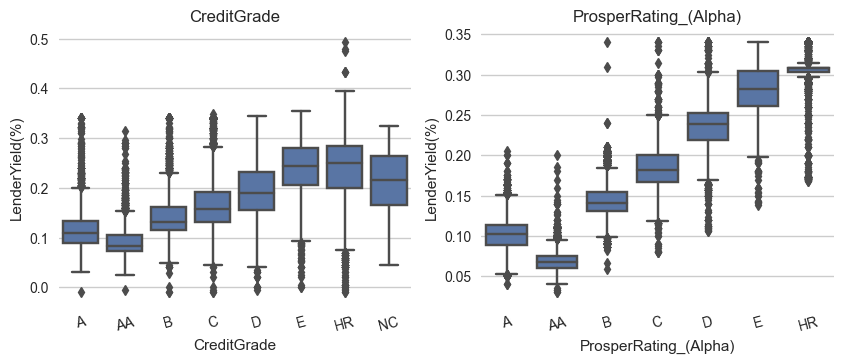

In [30]:
plt.figure(figsize = [10, 10])
plt.subplots_adjust(hspace= 0.8)
default_color = sns.color_palette()[0]

x1_vars = ['CreditGrade','ProsperRating_(Alpha)']
Y1_vars = ['LenderYield','LenderYield']
var1_len = range(len(x1_vars))

for x,y,z in zip(x1_vars,Y1_vars,var1_len):
    ax = plt.subplot(2,2,1+z)
    
    sns.set_style('whitegrid')
    sns.boxplot(data= df_loan_copy, x=x, y=y, color = default_color )
    #plt.legend(bbox_to_anchor = (0.90, -0.18), ncols = 5)
    plt.ylabel('LenderYield(%)')
    plt.xticks(rotation = 15)
    plt.title(x)
    

# LP_GrossPrincipalLoss VS CreditGrade and ProsperRating_(Alpha)
 
Plotting the LP_GrossPrincipalLoss with Both Rating systems, CreditGrade shows a wider range of values for LP_GrossPrincipalLoss, with grade B ---> NC, LP_GrossPrincipalLoss show a very range of values, but systems contain outliers



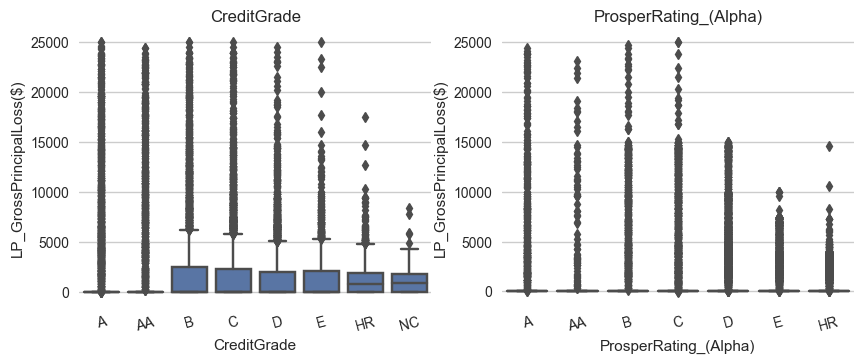

In [32]:
plt.figure(figsize = [10, 10])
plt.subplots_adjust(hspace= 0.8)
default_color = sns.color_palette()[0]

x1_vars = ['CreditGrade','ProsperRating_(Alpha)']
Y1_vars = ['LP_GrossPrincipalLoss','LP_GrossPrincipalLoss']
var1_len = range(len(x1_vars))

for x,y,z in zip(x1_vars,Y1_vars,var1_len):
    ax = plt.subplot(2,2,1+z)
    
    sns.set_style('whitegrid')
    sns.boxplot(data= df_loan_copy, x=x, y=y, color = default_color )
    #plt.legend(bbox_to_anchor = (0.90, -0.18), ncols = 5)
    plt.ylabel('LP_GrossPrincipalLoss($)')

    plt.xticks(rotation = 15)
    plt.title(x)
    

# CreditGrade and ProsperRating_(Alpha) by LenderYield
Comparing the averages for both grading systems. There is a significant decrease in LP_GrossPrincipalLoss for the ProsperRating_(Alpha) over the CreditGrade rating system; this increase is most evident in grades 'B' and 'C'  and a Marginal increase in LenderYield. The CreditGrade system shows a consistently higher amount for each credit grade, with the highest LP_GrossPrincipalLoss for the credit system being Grade 'B'with an average LP_GrossPrincipalLoss of over \\$2000"  at grade 'B'ProsperRating_(Alpha) has an average LP_GrossPrincipalLoss of \\$250. 

LenderYeild shows a variation of both Grading systems, with the CreditGrade system offering a higher yield for loans from higher grades A' and 'AA' and ProsperRating_(Alpha) showing an increased loan yield for lower grades C,' 'D,' 'E,' 'NR'




In [40]:
def format_number1(data_value,idx):
    '''
    This Function takes a list of int or float values with high
    exponential and converts them to string forrmat
    example 1,000,000 to 1M , where 'M' is millon 
    
    '''
    if type(data_value) == list:
        result = []
        for i in data_value:
            if  (i >= 1_000_000.00) & (i < 1_000_000_000.00):
                formatter = '{:.1f}M'.format(i*0.000001)
                result.append(formatter)
            elif (i >= 100_000.00) & (i < 1_000_000.00):
                formatter = '{:.1f}K'.format(i*0.001)
                result.append(formatter)
            elif (i >= 0.00) & (i < 99_000.00):
                formatter = round(i,1)
                result.append(formatter)
                formatter = 0
                result.append(formatter)
        return result

    else:
        if  (data_value >= 1_000_000.00) & (data_value < 1_000_000_000.00):
            formatter = '{:.1f}M'.format(data_value*0.000001)
            return formatter
        elif (data_value >= 100_000.00) & (data_value < 1_000_000.00):
            formatter = '{:.1f}K'.format(data_value*0.001)
            return formatter
        elif (data_value >= 0.00) & (data_value < 99_000.00):
            formatter = round(data_value,1)
            return formatter
        elif data_value == 0:
            formatter = 0
            return formatter
        else: pass
            
    

In [41]:
grade2009 = df_loan_copy.groupby('CreditGrade') #Creating a Groupy object for CreditGrade
grade2014 = df_loan_copy.groupby('ProsperRating_(Alpha)') #Creating a Groupy object for ProsperRating_(Alpha)


In [42]:
Data2009 = pd.DataFrame(data = grade2009 [['LP_GrossPrincipalLoss','LenderYield']].mean()
                        )
Data2014 = pd.DataFrame(grade2014[['LP_GrossPrincipalLoss','LenderYield']].mean())

In [43]:
Data2009 = Data2009.rename(columns={'LP_GrossPrincipalLoss':'LP_GrossPrincipalLoss_2009','LenderYield':'LenderYield_2009'})
Data2014=  Data2014.rename(columns={'ProsperRating_(Alpha)':'CreditGrade','LP_GrossPrincipalLoss':'LP_GrossPrincipalLoss_2014','LenderYield':'LenderYield_2014'})
Data2009 = Data2009.drop('NC')
Data2009.reset_index(inplace= True)

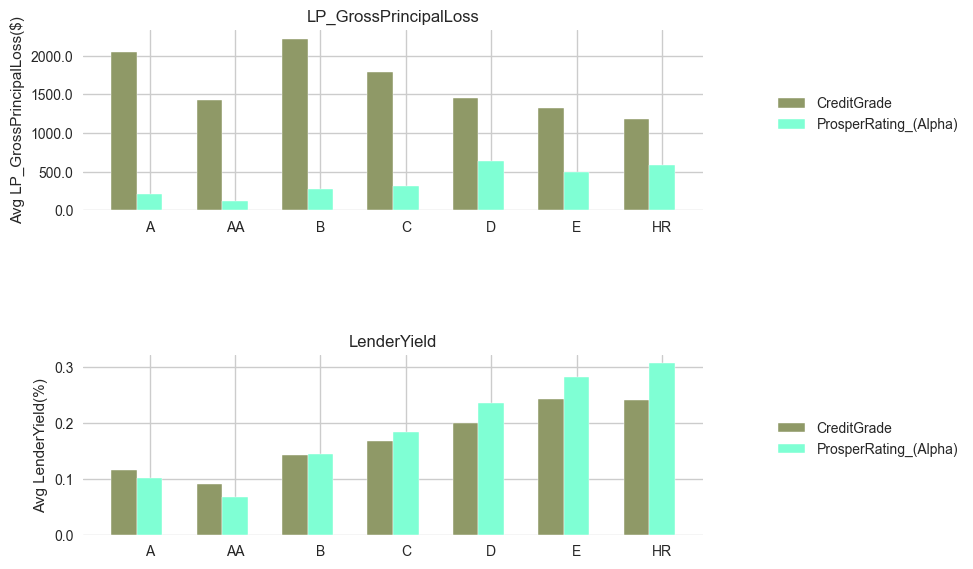

In [50]:
x_vars = ['LP_GrossPrincipalLoss_2009','LenderYield_2009']

y_vars =   ['LP_GrossPrincipalLoss_2014','LenderYield_2014']

yxis1 = ['Avg LP_GrossPrincipalLoss($)','Avg LenderYield(%)']

fig = plt.figure(figsize=[8,15]) #figure size
plt.subplots_adjust(hspace= 0.8)
                   
var_len =range(len(x_vars))
dex_x = list(Data2009.CreditGrade)
x_offset = np.arange(len(dex_x)) #create an list index
width = 0.3
sns.set_style('whitegrid')

for w,x,y,z in zip(yxis1,x_vars, y_vars,var_len):
    ax=fig.add_subplot(4,1,1+z)
    

    dev_y = list(Data2009[x])   
    med_devy = list(Data2014[y])
    

    ax.bar(x_offset - width, dev_y,    width = width ,color = '#8F9967', label = x)
    ax.bar(x_offset , med_devy, width = width ,color = '#7FFFD4' ,label= y)
       

    plt.xticks(ticks = x_offset, labels = dex_x) #corrrecting the x- axis
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_number1));
    plt.tick_params(top = 'off', right = 'off')
    plt.legend(bbox_to_anchor = (1.1, 0.7), labels = ['CreditGrade','ProsperRating_(Alpha)'])
    plt.title (x[:-5])
    plt.ylabel(w)     # Label the 'x' axis
   

# LP_GrossPrincipalLoss and LenderYield for Loan Staus
We see how the Loan Grading systems impact the Default and charged-off LoanStatus. The `ProsperRating_(Alpha)` Shows a more even distribution across each CreditGrade for each group within each loan status, `CreditGrade`shows a higher Default and charged-off rate for the A and AA groups and a progressive decrease from the highest Grade to the least Grade.

The CreditGrade system shows a higher LP_GrossPrincipalLoss amount for each grade,  The `ProsperRating_(Alpha)` shows a more evenly distributed `LP_GrossPrincipalLoss` 

LenderYield shows a Progressive increase for both Grading systems, from the highest grade with the least Yield and the lowest grade with the highest Yield. This explains why the difference in yield is marginal for the previous chart




In [35]:
df_status = df_loan.copy()

#creating a filter
a = df_status['LoanStatus'].isin(['Current', 'Completed','Defaulted','Cancelled','Chargedoff','FinalPaymentInProgress'])
a =df_status[~a].index  
df_status['LoanStatus'].iloc[a] = 'Past_Due'

df_status['ProsperRating (Alpha)'] = df_status['ProsperRating (Alpha)'].astype('category')
df_status['CreditGrade'] = df_status['CreditGrade'].astype('category')


#spliting the LoanStatus column into different Frames for easy analysis 
df_status1 = df_status.copy()
a = df_status1['LoanStatus'].isin(['FinalPaymentInProgress', 'Cancelled','Past_Due','Current', 
                                   'Completed','Cancelled','FinalPaymentInProgress'])
a = df_status1[~a].index
df_status1 = df_status1.iloc[a]


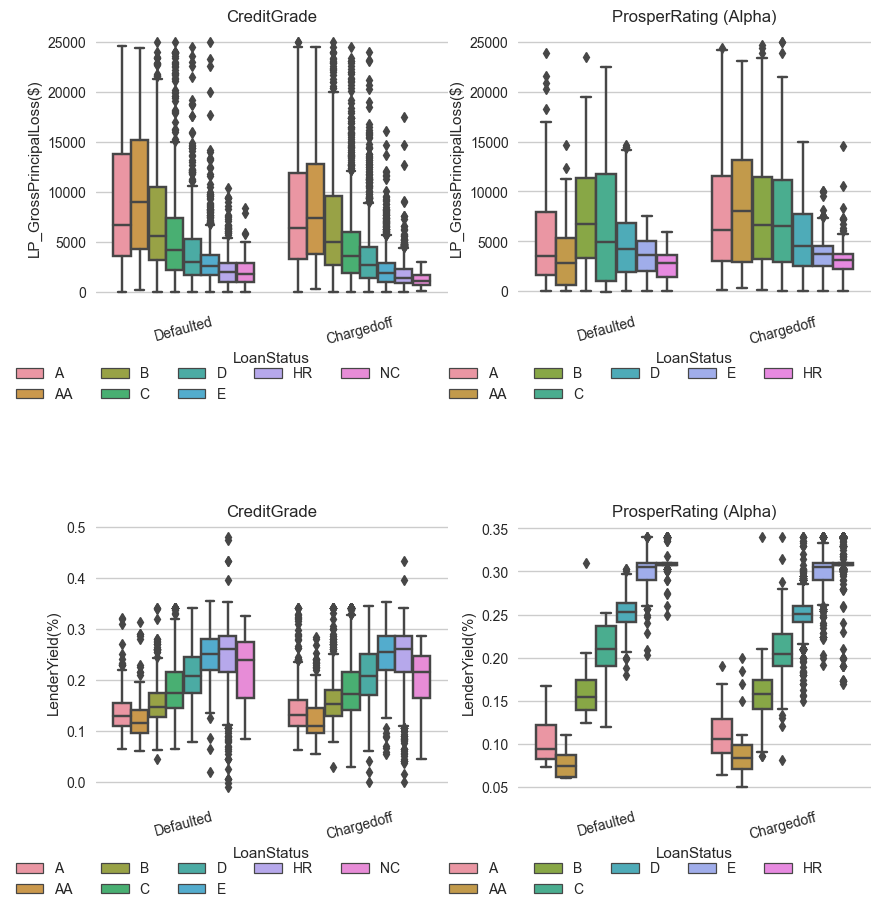

In [36]:
plt.figure(figsize = [10, 10])
plt.subplots_adjust(hspace= 0.8)

x1_vars = ['CreditGrade','ProsperRating (Alpha)','CreditGrade','ProsperRating (Alpha)']
Y1_vars = ['LP_GrossPrincipalLoss','LP_GrossPrincipalLoss','LenderYield','LenderYield']
yaxis = ['LP_GrossPrincipalLoss($)','LP_GrossPrincipalLoss($)','LenderYield(%)','LenderYield(%)']
var1_len = range(len(x1_vars))

for w,x,y,z in zip(yaxis,x1_vars,Y1_vars,var1_len):
    ax = plt.subplot(2,2,1+z)
    
    sns.set_style('whitegrid')
    sns.boxplot(data= df_status1, x='LoanStatus', y=y , hue= x )
    plt.legend(bbox_to_anchor = (0.90, -0.18), ncols = 5)
    plt.ylabel(w)

    plt.xticks(rotation = 15)
    plt.title(x)
    


In [ ]:
!jupyter  nbconvert ProsperLoan_part_II.ipynb --to slides --post serve --no-input --no-prompt